In [2]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_clipboard()#copy data from clipbord

In [4]:
df

,Period,Focus,OECD countries,Partner countries,Participating students,Notes
0,2000,Reading,28,4 + 11,"265,000",The Netherlands disqualified from data analysi...
1,2003,Mathematics,30,11,"275,000",UK disqualified from data analysis. Also inclu...
2,2006,Science,30,27,"400,000",Reading scores for US excluded from analysis d...
3,2009[3],Reading,34,41 + 10,"470,000",10 additional non-OECD countries took the test...
4,2012[5],Mathematics,34,31,"510,000",NaN


In [215]:
df_math = pd.read_clipboard()

In [216]:
df_math.head(3)

,1,"China Shanghai, China",613
0,2,Singapore,573
1,3,"Hong Kong, China",561
2,4,Taiwan,560


In [257]:
df_math.head(10)

,Rank,Country,Score
0,2,Singapore,573
1,3,"Hong Kong, China",561
2,4,Taiwan,560
3,5,South Korea,554
4,6,"Macau, China",538
5,7,Japan,536
6,8,Liechtenstein,535
7,9,Switzerland,531
8,10,Netherlands,523
9,11,Estonia,521


In [12]:
df_math.tail(5)# First FIVE 

,1,"China Shanghai, China",613
0,2,Singapore,573
1,3,"Hong Kong, China",561
2,4,Taiwan,560
3,5,South Korea,554
4,6,"Macau, China",538


In [217]:
df_science = pd.read_clipboard()

In [218]:
df_science.head(5)

,1,"China Shanghai, China",580
0,2,"Hong Kong, China",555
1,3,Singapore,551
2,4,Japan,547
3,5,Finland,545
4,6,Estonia,541


In [221]:
df_reading= pd.read_clipboard()

In [222]:
df_reading.head(5)

,1,"China Shanghai, China",570
0,2,"Hong Kong, China",545
1,3,Singapore,542
2,4,Japan,538
3,5,South Korea,536
4,6,Finland,524


In [223]:
df_science.tail(5)

,1,"China Shanghai, China",580
59,61,Tunisia,398
60,62,Albania,397
61,63,Qatar,384
62,64,Indonesia,382
63,65,Peru,373


In [224]:
#
df_reading.loc[64]=np.array([66,"China Shanghai, China",570])
df_math.loc[64]=np.array([66,"China Shanghai, China",613])
df_science.loc[64]=np.array([66,"China Shanghai, China",580])

In [225]:
df_reading.tail(5)

,1,"China Shanghai, China",570
60,62,Albania,394
61,63,Kazakhstan,393
62,64,Qatar,388
63,65,Peru,384
64,66,"China Shanghai, China",570


In [226]:
df_science.columns

Index(['1', 'China Shanghai, China', '580'], dtype='object')

In [227]:
df_reading = df_reading.rename(index=str, columns={"1": "Rank", "China Shanghai, China": "Country","570":"Score"})

In [228]:
df_reading.head(2)

,Rank,Country,Score
0,2,"Hong Kong, China",545
1,3,Singapore,542


In [229]:
df_math = df_math.rename(index=str, columns={"1": "Rank", "China Shanghai, China": "Country","613":"Score"})

In [230]:
df_math.head(2)

,Rank,Country,Score
0,2,Singapore,573
1,3,"Hong Kong, China",561


In [231]:
df_science =df_science.rename(index=str, columns={"1": "Rank", "China Shanghai, China": "Country","580":"Score"})

In [232]:
df_science.head(2)

,Rank,Country,Score
0,2,"Hong Kong, China",555
1,3,Singapore,551


In [233]:
temp = pd.merge(df_math, df_science, on='Country', how ='outer')

In [234]:
temp.head(5)

,Rank_x,Country,Score_x,Rank_y,Score_y
0,2,Singapore,573,3,551
1,3,"Hong Kong, China",561,2,555
2,4,Taiwan,560,13,523
3,5,South Korea,554,7,538
4,6,"Macau, China",538,16=,521


In [235]:
temp = pd.merge(temp, df_reading, on= 'Country', how='outer')

In [236]:
temp.head(5)

,Rank_x,Country,Score_x,Rank_y,Score_y,Rank,Score
0,2,Singapore,573,3,551,3,542
1,3,"Hong Kong, China",561,2,555,2,545
2,4,Taiwan,560,13,523,7=,523
3,5,South Korea,554,7,538,5,536
4,6,"Macau, China",538,16=,521,16=,509


In [237]:
del temp['Rank_x']

In [238]:
temp.head(5)

,Country,Score_x,Rank_y,Score_y,Rank,Score
0,Singapore,573,3,551,3,542
1,"Hong Kong, China",561,2,555,2,545
2,Taiwan,560,13,523,7=,523
3,South Korea,554,7,538,5,536
4,"Macau, China",538,16=,521,16=,509


In [239]:
df = temp.rename(index=str, columns={"Country":"Country", "Score_x":"Math", "Score_y":"Science","Score":"Reading"})

In [240]:
df.head(1)

,Country,Math,Rank_y,Science,Rank,Reading
0,Singapore,573,3,551,3,542


In [241]:
df['Math'] = pd.to_numeric(df['Math'])
df['Science'] = pd.to_numeric(df['Science'])
df['Reading'] = pd.to_numeric(df['Reading'])

In [242]:
df['Average']=(df['Math']+df['Science']+df['Reading'])/3

In [243]:
df.head(5)

,Country,Math,Rank_y,Science,Rank,Reading,Average
0,Singapore,573,3,551,3,542,555.333333
1,"Hong Kong, China",561,2,555,2,545,553.666667
2,Taiwan,560,13,523,7=,523,535.333333
3,South Korea,554,7,538,5,536,542.666667
4,"Macau, China",538,16=,521,16=,509,522.666667


In [244]:
df['Rank'] = df['Average'].rank(ascending=False)

In [245]:
df.head(10)

,Country,Math,Rank_y,Science,Rank,Reading,Average
0,Singapore,573,3,551,2.0,542,555.333333
1,"Hong Kong, China",561,2,555,3.0,545,553.666667
2,Taiwan,560,13,523,6.0,523,535.333333
3,South Korea,554,7,538,4.0,536,542.666667
4,"Macau, China",538,16=,521,10.0,509,522.666667
5,Japan,536,4,547,5.0,538,540.333333
6,Liechtenstein,535,10=,525,9.0,516,525.333333
7,Switzerland,531,19,515,14.0,509,518.333333
8,Netherlands,523,14=,522,13.0,511,518.666667
9,Estonia,521,6,541,8.0,516,526.000000


In [246]:
df.tail(10)

,Country,Math,Rank_y,Science,Rank,Reading,Average
55,Albania,394,62,397,61.0,394,395.000000
56,Brazil,391,59,405,57.0,410,402.000000
57,Argentina,388,58,406,59.5,396,396.666667
58,Tunisia,388,61,398,59.5,404,396.666667
59,Jordan,386,57,409,58.0,399,398.000000
60,Colombia,376,60,399,62.0,403,392.666667
61,Qatar,376,63,384,64.0,388,382.666667
62,Indonesia,375,64,382,63.0,396,384.333333
63,Peru,368,65,373,65.0,384,375.000000
64,"China Shanghai, China",613,66,580,1.0,570,587.666667


In [247]:
df.sort_values('Rank')

,Country,Math,Rank_y,Science,Rank,Reading,Average
64,"China Shanghai, China",613,66,580,1.0,570,587.666667
0,Singapore,573,3,551,2.0,542,555.333333
1,"Hong Kong, China",561,2,555,3.0,545,553.666667
3,South Korea,554,7,538,4.0,536,542.666667
5,Japan,536,4,547,5.0,538,540.333333
...,...,...,...,...,...,...,...
55,Albania,394,62,397,61.0,394,395.000000
60,Colombia,376,60,399,62.0,403,392.666667
62,Indonesia,375,64,382,63.0,396,384.333333
61,Qatar,376,63,384,64.0,388,382.666667


In [248]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [249]:
import random
random.seed(0)
A = df['Average']
B = df['Math']

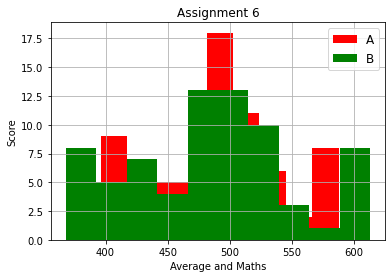

In [250]:
plt.title("Assignment 6")
plt.xlabel('Average and Maths')
plt.ylabel('Score')
plt.hist(a, label ='A', color='r')
plt.hist(b, label='B' , color='g')
plt.legend(prop={'size':12})
plt.grid()
plt.show()

In [251]:
# Function find_Outlier()
def find_anomaly(data):
    anomaly_list = list()
    for index,X in enumerate(data):
        data_mean = np.mean(data)
        data_std = np.std(data)
        anomaly_cut_off = data_std * 1.8
        lower_limit  = data_mean - anomaly_cut_off 
        upper_limit = data_mean + anomaly_cut_off
        if X > upper_limit or X < lower_limit:
            anomaly_list.append(index)
            
    return anomaly_list


In [252]:
def find_Outlier(column_str):
    list_Values = list(df[column_str])
    list_Countries = list(df['Country'])
    data = np.array(list_Values)
    indicies = find_anomaly(data)
    anomaly_Countries = list()
    for index in indicies:
        anomaly_Countries.append(list_Countries[index])
    print("The outliers in {0} are {1}".format(column_str, anomaly_Countries))


In [253]:
find_Outlier('Math')

The outliers in Math are [' Singapore', ' Peru', 'China Shanghai, China']


In [254]:
find_Outlier('Science')

The outliers in Science are [' Qatar', ' Indonesia', ' Peru', 'China Shanghai, China']


In [255]:
find_Outlier ("Reading")

The outliers in Reading are [' Qatar', ' Peru', 'China Shanghai, China']


In [256]:
find_Outlier('Average')

The outliers in Average are [' Qatar', ' Indonesia', ' Peru', 'China Shanghai, China']
